# File Upload

In [48]:
import pandas as pd
import ast
import os
from datetime import datetime, timedelta
file_path = r"C:\Users\HP\Desktop\SW Project\project_dataset_sw.csv"
df1 = pd.read_csv(file_path)
columns_to_drop = [col for col in df1.columns if 'Unnamed' in col or col == 'index']
df1 = df1.drop(columns=columns_to_drop)
df1

,SENDINGDATE,MTN,SENDER_ID,SENDER_LEGALNAME,CHANNEL,PAYER_REPCODE,SENDER_COUNTRY,SENDER_STATUS,SENDER_DATEOFBIRTH,SENDER_EMAIL,...,BENEFICIARY_MOBILE,BENEFICIARY_PHONE,SENDING_COUNTRY,PAYOUTCOUNTRY,STATUS,TOTALSALE,SENDINGCURRENCY,PAYMENTMETHOD,COMPLIANCERELEASEDATE,Sender_Status
0,2023-10-01 00:00:41.669,2084272134,560109,A&E EXPRESS SPA,Independent,101056,CHILE,Approved,1976-06-20,NaN,...,8.093913e+09,NaN,CHILE,DOMINICAN REPUBLIC,Paid Out,50000.00,CLP,Cash,NaN,NaN
1,2023-10-01 00:00:49.364,3926548981,560179,NOEL ANDRE LUCAS,Independent,101207,CHILE,Approved,1972-09-10,NaN,...,3.703948e+07,NaN,CHILE,HAITI,Paid Out,81000.00,CLP,Cash,NaN,Genuine
2,2023-10-01 00:01:07.533,380253089,600294,RUBENS CHARLES,Independent,101207,BRAZIL,Approved,1998-05-23,aladinlicel@gmail.com,...,3.712919e+07,NaN,BRAZIL,HAITI,Paid Out,554.57,BRL,Cash,NaN,Genuine
3,2023-10-01 00:01:22.976,3196736129,400529,KERLIM YOSAID MATA MONSERRATTE,Independent,101160,CANADA,Approved,1996-01-05,NaN,...,NaN,NaN,CANADA,GUATEMALA,Paid Out,210.00,CAD,Cash,NaN,NaN
4,2023-10-01 00:02:15.376,3647108969,400571,JESUS HERNANDEZ HERNANDEZ,Independent,9100,CANADA,Approved,1990-09-04,NaN,...,NaN,NaN,CANADA,COLOMBIA,Paid Out,176.43,CAD,Cash,NaN,Suspicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174274,2024-02-17 16:26:09.36,2726064192,808625,ASSURED EXCHANGE LIMITED,Independent,101119,UNITED KINGDOM,Approved,1965-03-21,notprovided@customer.com,...,1.196630e+10,NaN,UNITED KINGDOM,BRAZIL,Paid Out,101.16,GBP,Cash,NaN,NaN
1174275,2024-02-17 16:26:09.729,3250205060,560005,GM IQUIQUE,Independent,101641,CHILE,Approved,1989-12-18,sin correo,...,1.310955e+09,NaN,CHILE,BOLIVIA,Paid Out,30000.00,CLP,Cash,NaN,NaN
1174276,2024-02-17 16:26:17.134,1280605375,61041,BURRAQ TRAVEL & TOURS,Master Agent,101369,GREECE,Approved,1960-09-12,marinadvali45@gmail.com,...,NaN,NaN,GREECE,GEORGIA,Paid Out,121.44,EUR,Cash,NaN,Genuine
1174277,2024-02-17 16:26:18.955,1129239217,955151,SKY GLOBAL LTD,Independent,10603,UNITED KINGDOM,Under review,1996-01-15,NaN,...,1.713270e+09,NaN,UNITED KINGDOM,BANGLADESH,Paid Out,1010.88,GBP,Cash,NaN,NaN


In [49]:
df1.columns

Index(['SENDINGDATE', 'MTN', 'SENDER_ID', 'SENDER_LEGALNAME', 'CHANNEL',
       'PAYER_REPCODE', 'SENDER_COUNTRY', 'SENDER_STATUS',
       'SENDER_DATEOFBIRTH', 'SENDER_EMAIL', 'SENDER_MOBILE', 'SENDER_PHONE',
       'BENEFICIARY_CLIENTID', 'BENEFICIARY_NAME', 'BENEFICIARY_FIRSTNAME',
       'BENEFICIARY_COUNTRY', 'BENEFICIARY_EMAIL', 'BENEFICIARY_MOBILE',
       'BENEFICIARY_PHONE', 'SENDING_COUNTRY', 'PAYOUTCOUNTRY', 'STATUS',
       'TOTALSALE', 'SENDINGCURRENCY', 'PAYMENTMETHOD',
       'COMPLIANCERELEASEDATE', 'Sender_Status'],
      dtype='object')

In [50]:
import pandas as pd
from datetime import timedelta

# sender_country = input("Enter Sender Country:").upper()
# sender_country1 = input("Enter Sender Country:").upper()

initial_date = pd.to_datetime('2023-10-01')
end_date_M = pd.to_datetime('2024-03-31')
spiking_duration = 6
end_date_N = end_date_M - timedelta(days=spiking_duration)

print("initial_date:", initial_date)
print("end_date_N:", end_date_N)
print("end_date_M:", end_date_M)
print("spiking_duration:", spiking_duration)


dfn = df1
# [(df1['SENDER_COUNTRY'].isin([sender_country, sender_country1])) & (df1['CHANNEL'].isin(["Independent", "Master Agent"]))]


dfn['SENDINGDATE'] = pd.to_datetime(dfn['SENDINGDATE']).dt.date
start_date = initial_date.date()
end_date = end_date_N.date()
dfn = dfn[(dfn['SENDINGDATE'] >= start_date) & (dfn['SENDINGDATE'] <= end_date)]
dfn['BENEFICIARY_EMAIL'] = dfn['BENEFICIARY_EMAIL'].astype(str)
agent_ids = dfn['SENDER_ID'].unique()


initial_date: 2023-10-01 00:00:00
end_date_N: 2024-03-25 00:00:00
end_date_M: 2024-03-31 00:00:00
spiking_duration: 6


In [51]:
import pandas as pd
import numpy as np

def trx_metrics(agent_id, dfn, SENDER_LEGALNAME):
    agent_data = dfn[dfn['SENDER_ID'] == agent_id]
    paid_out_count = agent_data[agent_data['STATUS'] == 'Paid Out'].shape[0]
    total_transactions = agent_data['MTN'].count()
    total_beneficiaries = agent_data['BENEFICIARY_CLIENTID'].nunique()

    trx_list = []
    volume_list = []

    for sending_date in agent_data['SENDINGDATE'].unique():
        same_day_data = agent_data[agent_data['SENDINGDATE'] == sending_date]
        counts = same_day_data.shape[0]
        trx_list.append(counts)
        total_sale = same_day_data['TOTALSALE'].sum()
        volume_list.append(total_sale)
        beneficiary_emails = same_day_data['BENEFICIARY_EMAIL']
    
    trx_list = sorted(trx_list, reverse=True)
    top_5_daily_trx = trx_list[:5]
    avg_of_top_5_daily_trx = np.average(top_5_daily_trx)
    all_bottom_values = trx_list[5:]
    avg_bottom_values_n = np.average(all_bottom_values) if all_bottom_values else 0
    std_dev_top_5 = np.std(top_5_daily_trx // avg_bottom_values_n) * 100 if avg_bottom_values_n != 0 else 0
    
    # Volume metrics calculations
    sorted_volume_list = sorted(volume_list, reverse=True)
    top_5_volumes = sorted_volume_list[:5]
    avg_top_volumes = np.average(top_5_volumes)
    all_bottom_volumes = sorted_volume_list[5:]
    avg_bottom_volumes_n = np.average(all_bottom_volumes) if all_bottom_volumes else 0
    
    std_dev_vol = np.std(top_5_volumes // avg_bottom_volumes_n) * 100 if avg_bottom_volumes_n != 0 else 0
    
    result_dict = {
        "Agent Repcode": agent_id,
        "Total Trx": total_transactions,
        "Total Beneficiaries": total_beneficiaries,
        "Total Paid out Trx": paid_out_count,
        "Top 05 Daily Trx": top_5_daily_trx,
        "Avg Top 05 Daily Trx": avg_of_top_5_daily_trx,
        "SD of Top 5 Trx": std_dev_top_5,
        "Top 05 Volumes": top_5_volumes,
        "Avg top Volumes": avg_top_volumes,
        "Std Dev Vol": std_dev_vol,
        "Trx Bottoms Avg": avg_bottom_values_n,
        "Vol Bottoms Avg": avg_bottom_volumes_n,
    }
    
    return result_dict

def main(dfn, agent_ids):
    dfn['BENEFICIARY_EMAIL'] = dfn['BENEFICIARY_EMAIL'].astype(str)
    
    result_list = []
    for agent_number in agent_ids:
        agent_data = dfn[dfn['SENDER_ID'] == agent_number]
        if agent_data.empty:
            continue  # Skip to the next agent_number if there's no data for the current agent_number
        SENDER_LEGALNAME = agent_data['SENDER_LEGALNAME'].iloc[0]
        result_dict = trx_metrics(agent_number, dfn, SENDER_LEGALNAME)
        result_list.append(result_dict)
    
    result_df = pd.DataFrame(result_list)

    float_cols = ['Avg Top 05 Daily Trx', 'SD of Top 5 Trx', 'Avg top Volumes', 'Std Dev Vol']
    int_cols = ['Total Trx', 'Total Beneficiaries', 'Total Paid out Trx']
  
    return result_df

result_df_N = main(dfn, agent_ids)



In [52]:
result_df_N

,Agent Repcode,Total Trx,Total Beneficiaries,Total Paid out Trx,Top 05 Daily Trx,Avg Top 05 Daily Trx,SD of Top 5 Trx,Top 05 Volumes,Avg top Volumes,Std Dev Vol,Trx Bottoms Avg,Vol Bottoms Avg
0,560109,1302,826,1147,"[27, 24, 22, 22, 22]",23.4,40.000000,"[3165000.0, 2902000.0, 2464000.0, 2354500.0, 2...",2637700.000,74.833148,8.777778,785098.014667
1,560179,1163,703,1087,"[27, 26, 21, 20, 20]",22.8,48.989795,"[4130839.3200000003, 2663901.6799999997, 25280...",2824948.200,80.000000,7.828358,692679.780522
2,600294,1182,711,1127,"[34, 31, 30, 29, 28]",30.4,40.000000,"[31882.65, 26926.320000000003, 22073.870000000...",24119.442,101.980390,7.803030,5132.885682
3,400529,2084,753,2042,"[110, 81, 81, 76, 76]",84.8,109.544512,"[108062.5, 79595.19, 79476.45999999999, 78528....",83678.472,97.979590,13.070866,12411.205984
4,400571,6357,3163,5988,"[127, 116, 106, 103, 96]",109.6,0.000000,"[62398.58, 61915.740000000005, 46871.34, 45867...",52449.540,48.989795,44.343511,20399.490916
...,...,...,...,...,...,...,...,...,...,...,...,...
2717,59195,2,2,0,[2],2.0,0.000000,[220.0],220.000,0.000000,0.000000,0.000000
2718,27586,1,1,1,[1],1.0,0.000000,[14.5],14.500,0.000000,0.000000,0.000000
2719,27581,1,1,0,[1],1.0,0.000000,[492.5],492.500,0.000000,0.000000,0.000000
2720,952380,1,1,1,[1],1.0,0.000000,[173.11],173.110,0.000000,0.000000,0.000000


In [53]:
lookup_df = result_df_N[['Agent Repcode', 'Trx Bottoms Avg', 'Vol Bottoms Avg']]

In [54]:
lookup_df.tail(5)

,Agent Repcode,Trx Bottoms Avg,Vol Bottoms Avg
2717,59195,0.0,0.0
2718,27586,0.0,0.0
2719,27581,0.0,0.0
2720,952380,0.0,0.0
2721,44260,0.0,0.0


In [55]:
result_df_N.tail()

,Agent Repcode,Total Trx,Total Beneficiaries,Total Paid out Trx,Top 05 Daily Trx,Avg Top 05 Daily Trx,SD of Top 5 Trx,Top 05 Volumes,Avg top Volumes,Std Dev Vol,Trx Bottoms Avg,Vol Bottoms Avg
2717,59195,2,2,0,[2],2.0,0.0,[220.0],220.00,0.0,0.0,0.0
2718,27586,1,1,1,[1],1.0,0.0,[14.5],14.50,0.0,0.0,0.0
2719,27581,1,1,0,[1],1.0,0.0,[492.5],492.50,0.0,0.0,0.0
2720,952380,1,1,1,[1],1.0,0.0,[173.11],173.11,0.0,0.0,0.0
2721,44260,2,2,0,"[1, 1]",1.0,0.0,"[5250.0, 5200.0]",5225.00,0.0,0.0,0.0


# Mth Day Analysis:

In [56]:
import pandas as pd

dfm = df1.copy()
dfm['SENDINGDATE'] = pd.to_datetime(dfm['SENDINGDATE'])
initial_date = pd.to_datetime(initial_date)
end_date_M = pd.to_datetime(end_date_M)
dfm = dfm[(dfm['SENDINGDATE'] >= initial_date) & (dfm['SENDINGDATE'] <= end_date_M)]
agent_ids = dfm['SENDER_ID'].unique()
dfm['BENEFICIARY_EMAIL'] = dfm['BENEFICIARY_EMAIL'].astype(str)


In [57]:
import pandas as pd
import numpy as np

def calculate_ratios(dfm):
    dfm['SENDINGDATE'] = pd.to_datetime(dfm['SENDINGDATE'])
    grouped = dfm.groupby(['SENDINGDATE', 'SENDER_ID'])
    aggregated = grouped.agg(
        transactions=('MTN', 'count'),
        total_sale=('TOTALSALE', 'sum')
    ).reset_index()
    aggregated['ratio'] = aggregated['transactions'] / aggregated['total_sale']
    ratios_by_agent = aggregated.groupby('SENDER_ID')['ratio'].apply(list).reset_index()
    return ratios_by_agent

def match_sequences(SENDER_LEGALNAME, beneficiary_emails):
    unique_sequences = set()
    for length in range(3, len(SENDER_LEGALNAME) + 1):
        for i in range(len(SENDER_LEGALNAME) - length + 1):
            sequence = SENDER_LEGALNAME[i:i + length]
            for beneficiary_email in beneficiary_emails:
                if sequence.lower() in beneficiary_email.lower():
                    unique_sequences.add(sequence)
                    break  

    matching_sequences = sorted(unique_sequences, key=len, reverse=True)
    longest_sequence = []

    for seq in matching_sequences:
        is_subsequence = any(seq in item for item in longest_sequence)
        if not is_subsequence:
            longest_sequence.append(seq)

    longest_sequence = [seq for seq in longest_sequence if str(seq).lower() != 'nan']

    return longest_sequence


def calculate_date_differences(dates):
    if len(dates) < 2:
        return []
    differences = []
    for i in range(len(dates) - 1):
        diff = (dates[i] - dates[i + 1]).astype('timedelta64[D]').astype(int)
        differences.append(diff)
    return differences

def trx_metrics(agent_id, dfm, SENDER_LEGALNAME, ratios_df):
    agent_data = dfm[dfm['SENDER_ID'] == agent_id]
    paid_out_count = agent_data[agent_data['STATUS'] == 'Paid Out'].shape[0]
    total_transactions = agent_data['MTN'].count()
    total_beneficiaries = agent_data['BENEFICIARY_CLIENTID'].nunique()
    
    trx_list = []
    volume_list = []
    matching_sequences_list = []
    
    # Calculate the most recent 5 sending dates for the agent
    recent_sending_dates = agent_data['SENDINGDATE'].unique()
    
    # Sort the recent sending dates using numpy's sort method
    recent_sending_dates = np.sort(recent_sending_dates)
    
    recent_sending_dates = recent_sending_dates[-5:][::-1]  # Get the most recent 5 dates in descending order
    
    date_differences = calculate_date_differences(recent_sending_dates)
    
    for sending_date in agent_data['SENDINGDATE'].unique():
        same_day_data = agent_data[agent_data['SENDINGDATE'] == sending_date]
        counts = same_day_data.shape[0]
        trx_list.append(counts)
        total_sale = same_day_data['TOTALSALE'].sum()
        volume_list.append(total_sale)
        beneficiary_emails = same_day_data['BENEFICIARY_EMAIL']
        matching_sequences = match_sequences(SENDER_LEGALNAME, beneficiary_emails)
        matching_sequences_list.extend(matching_sequences)
        
    daily_trx_list_sorted = sorted(trx_list, reverse=True)
    top_5_daily_trx = daily_trx_list_sorted[:5]
    avg_of_top_5_daily_trx = np.average(top_5_daily_trx)
    all_bottom_values = daily_trx_list_sorted[5:]
    avg_bottom_values = np.average(all_bottom_values) if all_bottom_values else 0
    
    sorted_volume_list = sorted(volume_list, reverse=True)
    top_5_volumes = sorted_volume_list[:5]
    avg_top_volumes = np.average(top_5_volumes)
    all_bottom_volumes = sorted_volume_list[5:]
    avg_bottom_volumes = np.average(all_bottom_volumes) if all_bottom_volumes else 0
    
    agent_ratios = ratios_df[ratios_df['SENDER_ID'] == agent_id]['ratio'].values
    agent_ratios = agent_ratios[0] if len(agent_ratios) > 0 else []
    
    sorted_ratios_list = sorted(agent_ratios, reverse=True)
    top_5_ratios = sorted_ratios_list[:5]
    avg_top_ratios = np.average(top_5_ratios) if top_5_ratios else 0
    all_bottom_ratios = sorted_ratios_list[5:]
    avg_bottom_ratios = np.average(all_bottom_ratios) if all_bottom_ratios else 0

    std_dev_ratios = np.std(top_5_ratios / avg_bottom_ratios) * 100 if avg_bottom_ratios != 0 else 0
    
    result_dict = {
        "Agent Repcode": agent_id,
        "Total Trx": total_transactions,
        "Total Beneficiaries": total_beneficiaries,
        "Total Paid out Trx": paid_out_count,
        "Daily Trx Pattern": trx_list,
        "Top 05 Daily Trx": top_5_daily_trx,
        "Avg Top 05 Daily Trx": avg_of_top_5_daily_trx,
        "Daily Trx Pattern Vol": volume_list,
        "Top 05 Volumes": top_5_volumes,
        "Avg top Volumes": avg_top_volumes,
        "Matching Sequences": matching_sequences_list, 
        "Length of Seq": len(matching_sequences_list),
        "ATV": agent_ratios,
        "Top 05 ATV": top_5_ratios,
        "Avg Top 05 ATV": avg_top_ratios,
        "Avg Bottom ATV": avg_bottom_ratios,
        "Std Dev ATV": std_dev_ratios,
        "Recent 5 Sending Dates": recent_sending_dates, 
        "Date Differences": date_differences,
        "Date Differences Avg": np.average(date_differences),
        "Date Differences Max": np.max(date_differences) if date_differences else None
    }
    
    return result_dict

def main(dfm, agent_ids):
    dfm['BENEFICIARY_EMAIL'] = dfm['BENEFICIARY_EMAIL'].astype(str)
    ratios_df = calculate_ratios(dfm)
    result_list = []
    for agent_number in agent_ids:
        SENDER_LEGALNAME = dfm[dfm['SENDER_ID'] == agent_number]['SENDER_LEGALNAME'].iloc[0]
        result_dict = trx_metrics(agent_number, dfm, SENDER_LEGALNAME, ratios_df)
        result_list.append(result_dict)
    result_df = pd.DataFrame(result_list)

    float_cols = ['ATV','Avg Top 05 Daily Trx', 'Avg top Volumes', 'Avg Top 05 ATV', 'Avg Bottom ATV', 'Std Dev ATV']
    int_cols = ['Total Trx', 'Total Beneficiaries', 'Total Paid out Trx', 'Length of Seq','Top 05 ATV','Top 05 Volumes']
    
    return result_df


result_df_M = main(dfm, agent_ids)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [58]:
result_df_M

,Agent Repcode,Total Trx,Total Beneficiaries,Total Paid out Trx,Daily Trx Pattern,Top 05 Daily Trx,Avg Top 05 Daily Trx,Daily Trx Pattern Vol,Top 05 Volumes,Avg top Volumes,...,Length of Seq,ATV,Top 05 ATV,Avg Top 05 ATV,Avg Bottom ATV,Std Dev ATV,Recent 5 Sending Dates,Date Differences,Date Differences Avg,Date Differences Max
0,560109,1302,826,1147,"[10, 4, 8, 9, 5, 10, 21, 3, 10, 4, 3, 2, 6, 10...","[27, 24, 22, 22, 22]",23.4,"[1569000.0, 434000.0, 810000.0, 2464000.0, 119...","[3165000.0, 2902000.0, 2464000.0, 2354500.0, 2...",2637700.000,...,0,"[6.373486297004461e-06, 9.216589861751152e-06,...","[3.7037037037037037e-05, 3.3333333333333335e-0...",0.000031,0.000013,30.638134,"[2024-02-17T00:00:00.000000000, 2024-02-16T00:...","[1, 1, 1, 1]",1.0,1.0
1,560179,1163,703,1087,"[5, 7, 10, 5, 9, 8, 19, 10, 8, 6, 3, 4, 2, 7, ...","[27, 26, 21, 20, 20]",22.8,"[801000.0, 725000.0, 956000.0, 530000.0, 90700...","[4130839.3200000003, 2663901.6799999997, 25280...",2824948.200,...,0,"[6.2421972534332085e-06, 9.655172413793103e-06...","[2.8455284552845528e-05, 2.7272727272727273e-0...",0.000027,0.000012,5.429231,"[2024-02-17T00:00:00.000000000, 2024-02-16T00:...","[1, 1, 1, 1]",1.0,1.0
2,600294,1182,711,1127,"[3, 7, 4, 4, 5, 30, 27, 15, 17, 6, 12, 6, 11, ...","[34, 31, 30, 29, 28]",30.4,"[2202.71, 4327.07, 2393.98, 2119.88, 3642.86, ...","[31882.65, 26926.320000000003, 22073.870000000...",24119.442,...,3,"[0.0013619586781737042, 0.0016177228470997697,...","[0.005987306909352174, 0.005171901061532693, 0...",0.004802,0.001774,40.725903,"[2024-02-16T00:00:00.000000000, 2024-02-15T00:...","[1, 1, 1, 1]",1.0,1.0
3,400529,2084,753,2042,"[4, 12, 29, 35, 110, 76, 63, 8, 9, 8, 41, 76, ...","[110, 81, 81, 76, 76]",84.8,"[1470.0, 10313.4, 37252.01, 37470.26, 108062.5...","[108062.5, 79595.19, 79476.45999999999, 78528....",83678.472,...,0,"[0.0027210884353741495, 0.001163534818779452, ...","[0.008547008547008548, 0.007462686567164179, 0...",0.006134,0.001248,131.796239,"[2024-02-17T00:00:00.000000000, 2024-02-16T00:...","[1, 1, 1, 1]",1.0,1.0
4,400571,6357,3163,5988,"[49, 70, 46, 65, 50, 70, 106, 68, 27, 36, 42, ...","[127, 116, 106, 103, 96]",109.6,"[24228.270000000004, 32761.87, 21984.1, 32135....","[62398.58, 61915.740000000005, 46871.34, 45867...",52449.540,...,0,"[0.002022430821515527, 0.002136630174040737, 0...","[0.00407836739815846, 0.003897155328039907, 0....",0.003584,0.002214,15.638440,"[2024-02-16T00:00:00.000000000, 2024-02-15T00:...","[1, 1, 1, 1]",1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,59195,2,2,0,[2],[2],2.0,[220.0],[220.0],220.000,...,0,[0.00909090909090909],[0.00909090909090909],0.009091,0.000000,0.000000,[2024-02-15T00:00:00.000000000],[],NaN,NaN
2718,27586,1,1,1,[1],[1],1.0,[14.5],[14.5],14.500,...,0,[0.06896551724137931],[0.06896551724137931],0.068966,0.000000,0.000000,[2024-02-15T00:00:00.000000000],[],NaN,NaN
2719,27581,1,1,0,[1],[1],1.0,[492.5],[492.5],492.500,...,0,[0.0020304568527918783],[0.0020304568527918783],0.002030,0.000000,0.000000,[2024-02-15T00:00:00.000000000],[],NaN,NaN
2720,952380,1,1,1,[1],[1],1.0,[173.11],[173.11],173.110,...,1,[0.005776673791231009],[0.005776673791231009],0.005777,0.000000,0.000000,[2024-02-16T00:00:00.000000000],[],NaN,NaN


In [59]:
M_Updated = pd.merge(result_df_M, lookup_df, right_on='Agent Repcode', left_on='Agent Repcode', how='inner')

In [60]:
M_Updated.tail()

,Agent Repcode,Total Trx,Total Beneficiaries,Total Paid out Trx,Daily Trx Pattern,Top 05 Daily Trx,Avg Top 05 Daily Trx,Daily Trx Pattern Vol,Top 05 Volumes,Avg top Volumes,...,Top 05 ATV,Avg Top 05 ATV,Avg Bottom ATV,Std Dev ATV,Recent 5 Sending Dates,Date Differences,Date Differences Avg,Date Differences Max,Trx Bottoms Avg,Vol Bottoms Avg
2717,59195,2,2,0,[2],[2],2.0,[220.0],[220.0],220.00,...,[0.00909090909090909],0.009091,0.0,0.0,[2024-02-15T00:00:00.000000000],[],NaN,NaN,0.0,0.0
2718,27586,1,1,1,[1],[1],1.0,[14.5],[14.5],14.50,...,[0.06896551724137931],0.068966,0.0,0.0,[2024-02-15T00:00:00.000000000],[],NaN,NaN,0.0,0.0
2719,27581,1,1,0,[1],[1],1.0,[492.5],[492.5],492.50,...,[0.0020304568527918783],0.002030,0.0,0.0,[2024-02-15T00:00:00.000000000],[],NaN,NaN,0.0,0.0
2720,952380,1,1,1,[1],[1],1.0,[173.11],[173.11],173.11,...,[0.005776673791231009],0.005777,0.0,0.0,[2024-02-16T00:00:00.000000000],[],NaN,NaN,0.0,0.0
2721,44260,2,2,0,"[1, 1]","[1, 1]",1.0,"[5200.0, 5250.0]","[5250.0, 5200.0]",5225.00,...,"[0.0001923076923076923, 0.00019047619047619048]",0.000191,0.0,0.0,"[2024-02-17T00:00:00.000000000, 2024-02-16T00:...",[1],1.0,1.0,0.0,0.0


In [61]:
avg_bottom_values_n = M_Updated['Trx Bottoms Avg'].mean() if 'Trx Bottoms Avg' in M_Updated else 0
avg_bottom_volumes_n = M_Updated['Vol Bottoms Avg'].mean() if 'Vol Bottoms Avg' in M_Updated else 0

if avg_bottom_values_n != 0:
    M_Updated['std_dev_top_5'] = M_Updated.apply(lambda row: np.std(row['Top 05 Daily Trx']) / row['Trx Bottoms Avg'] * 100 if row['Trx Bottoms Avg'] != 0 else 0, axis=1)
else:
    M_Updated['std_dev_top_5'] = 0
if avg_bottom_volumes_n != 0:
    M_Updated['std_dev_vol'] = M_Updated.apply(lambda row: np.std(row['Top 05 Volumes']) / row['Vol Bottoms Avg'] * 100 if row['Vol Bottoms Avg'] != 0 else 0, axis=1)
else:
    M_Updated['std_dev_vol'] = 0
M_Updated


,Agent Repcode,Total Trx,Total Beneficiaries,Total Paid out Trx,Daily Trx Pattern,Top 05 Daily Trx,Avg Top 05 Daily Trx,Daily Trx Pattern Vol,Top 05 Volumes,Avg top Volumes,...,Avg Bottom ATV,Std Dev ATV,Recent 5 Sending Dates,Date Differences,Date Differences Avg,Date Differences Max,Trx Bottoms Avg,Vol Bottoms Avg,std_dev_top_5,std_dev_vol
0,560109,1302,826,1147,"[10, 4, 8, 9, 5, 10, 21, 3, 10, 4, 3, 2, 6, 10...","[27, 24, 22, 22, 22]",23.4,"[1569000.0, 434000.0, 810000.0, 2464000.0, 119...","[3165000.0, 2902000.0, 2464000.0, 2354500.0, 2...",2637700.000,...,0.000013,30.638134,"[2024-02-17T00:00:00.000000000, 2024-02-16T00:...","[1, 1, 1, 1]",1.0,1.0,8.777778,785098.014667,22.324463,43.017183
1,560179,1163,703,1087,"[5, 7, 10, 5, 9, 8, 19, 10, 8, 6, 3, 4, 2, 7, ...","[27, 26, 21, 20, 20]",22.8,"[801000.0, 725000.0, 956000.0, 530000.0, 90700...","[4130839.3200000003, 2663901.6799999997, 25280...",2824948.200,...,0.000012,5.429231,"[2024-02-17T00:00:00.000000000, 2024-02-16T00:...","[1, 1, 1, 1]",1.0,1.0,7.828358,692679.780522,39.081141,95.919840
2,600294,1182,711,1127,"[3, 7, 4, 4, 5, 30, 27, 15, 17, 6, 12, 6, 11, ...","[34, 31, 30, 29, 28]",30.4,"[2202.71, 4327.07, 2393.98, 2119.88, 3642.86, ...","[31882.65, 26926.320000000003, 22073.870000000...",24119.442,...,0.001774,40.725903,"[2024-02-16T00:00:00.000000000, 2024-02-15T00:...","[1, 1, 1, 1]",1.0,1.0,7.803030,5132.885682,26.388800,91.407861
3,400529,2084,753,2042,"[4, 12, 29, 35, 110, 76, 63, 8, 9, 8, 41, 76, ...","[110, 81, 81, 76, 76]",84.8,"[1470.0, 10313.4, 37252.01, 37470.26, 108062.5...","[108062.5, 79595.19, 79476.45999999999, 78528....",83678.472,...,0.001248,131.796239,"[2024-02-17T00:00:00.000000000, 2024-02-16T00:...","[1, 1, 1, 1]",1.0,1.0,13.070866,12411.205984,97.903800,100.331488
4,400571,6357,3163,5988,"[49, 70, 46, 65, 50, 70, 106, 68, 27, 36, 42, ...","[127, 116, 106, 103, 96]",109.6,"[24228.270000000004, 32761.87, 21984.1, 32135....","[62398.58, 61915.740000000005, 46871.34, 45867...",52449.540,...,0.002214,15.638440,"[2024-02-16T00:00:00.000000000, 2024-02-15T00:...","[1, 1, 1, 1]",1.0,1.0,44.343511,20399.490916,24.397036,38.950250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,59195,2,2,0,[2],[2],2.0,[220.0],[220.0],220.000,...,0.000000,0.000000,[2024-02-15T00:00:00.000000000],[],NaN,NaN,0.000000,0.000000,0.000000,0.000000
2718,27586,1,1,1,[1],[1],1.0,[14.5],[14.5],14.500,...,0.000000,0.000000,[2024-02-15T00:00:00.000000000],[],NaN,NaN,0.000000,0.000000,0.000000,0.000000
2719,27581,1,1,0,[1],[1],1.0,[492.5],[492.5],492.500,...,0.000000,0.000000,[2024-02-15T00:00:00.000000000],[],NaN,NaN,0.000000,0.000000,0.000000,0.000000
2720,952380,1,1,1,[1],[1],1.0,[173.11],[173.11],173.110,...,0.000000,0.000000,[2024-02-16T00:00:00.000000000],[],NaN,NaN,0.000000,0.000000,0.000000,0.000000


In [62]:
def main(dfm, agent_ids):
    dfm['BENEFICIARY_EMAIL'] = dfm['BENEFICIARY_EMAIL'].astype(str)
    ratios_df = calculate_ratios(dfm)
    result_list = []
    for agent_number in agent_ids:
        SENDER_LEGALNAME = dfm[dfm['SENDER_ID'] == agent_number]['SENDER_LEGALNAME'].iloc[0]
        result_dict = trx_metrics(agent_number, dfm, SENDER_LEGALNAME, ratios_df)
        result_list.append(result_dict)
    result_df = pd.DataFrame(result_list)

    float_cols = ['ATV','Avg Top 05 Daily Trx', 'Avg top Volumes', 'Avg Top 05 ATV', 'Avg Bottom ATV', 'Std Dev ATV']
    int_cols = ['Total Trx', 'Total Beneficiaries', 'Total Paid out Trx', 'Length of Seq','Top 05 ATV','Top 05 Volumes']
    
    intermediate_stage = pd.merge(result_df, dfm, left_on='Agent Repcode', right_on='SENDER_ID', how='left')
    intermediate_stage = pd.merge(intermediate_stage, dfm[['SENDER_ID', 'SENDER_COUNTRY']], left_on='Agent Repcode', right_on='SENDER_ID', how='left')
    
    sd_top_5_trx = []
    for top_5_trx, trx_bottoms_avg in zip(intermediate_stage['Top 05 Daily Trx'], intermediate_stage['Trx Bottoms Avg']):
        if trx_bottoms_avg != 0:
            sd = np.std([trx / trx_bottoms_avg if trx_bottoms_avg != 0 else 0 for trx in top_5_trx]) * 100
        else:
            sd = 0
        sd_top_5_trx.append(sd)
    intermediate_stage['SD of Top 5 Trx'] = sd_top_5_trx

    std_dev_vol = []
    for top_5_vol, vol_bottoms_avg in zip(intermediate_stage['Top 05 Volumes'], intermediate_stage['Vol Bottoms Avg']):
        if vol_bottoms_avg != 0:
            sd = np.std([vol / vol_bottoms_avg if vol_bottoms_avg != 0 else 0 for vol in top_5_vol]) * 100
        else:
            sd = 0
        std_dev_vol.append(sd)
    intermediate_stage['Std Dev Vol'] = std_dev_vol
    result_df_M_updated = intermediate_stage
    return result_df_M_updated


In [63]:
intermediate_stage = pd.merge(result_df_M, lookup_df, on='Agent Repcode', how='left')
sd_top_5_trx = []
for top_5_trx, trx_bottoms_avg in zip(intermediate_stage['Top 05 Daily Trx'], intermediate_stage['Trx Bottoms Avg']):
    if trx_bottoms_avg != 0:
        sd = np.std([trx / trx_bottoms_avg if trx_bottoms_avg != 0 else 0 for trx in top_5_trx]) * 100
    else:
        sd = 0
    sd_top_5_trx.append(sd)
intermediate_stage['SD of Top 5 Trx'] = sd_top_5_trx

std_dev_vol = []
for top_5_vol, vol_bottoms_avg in zip(intermediate_stage['Top 05 Volumes'], intermediate_stage['Vol Bottoms Avg']):
    if vol_bottoms_avg != 0:
        sd = np.std([vol / vol_bottoms_avg if vol_bottoms_avg != 0 else 0 for vol in top_5_vol]) * 100
    else:
        sd = 0
    std_dev_vol.append(sd)
intermediate_stage['Std Dev Vol'] = std_dev_vol
result_df_M_updated = intermediate_stage
result_df_M_updated = pd.merge(result_df_M_updated, dfm[['SENDER_ID', 'SENDER_COUNTRY']], how='left', right_on='SENDER_ID', left_on='Agent Repcode')
result_df_M_updated.drop(columns=['SENDER_ID'], inplace=True)

In [64]:
result_df_M_updated.to_csv(r"C:\Users\HP\Desktop\SW Project\sequence_check.csv")
result_df_M_updated.tail()

,Agent Repcode,Total Trx,Total Beneficiaries,Total Paid out Trx,Daily Trx Pattern,Top 05 Daily Trx,Avg Top 05 Daily Trx,Daily Trx Pattern Vol,Top 05 Volumes,Avg top Volumes,...,Std Dev ATV,Recent 5 Sending Dates,Date Differences,Date Differences Avg,Date Differences Max,Trx Bottoms Avg,Vol Bottoms Avg,SD of Top 5 Trx,Std Dev Vol,SENDER_COUNTRY
1174274,27586,1,1,1,[1],[1],1.0,[14.5],[14.5],14.50,...,0.0,[2024-02-15T00:00:00.000000000],[],NaN,NaN,0.0,0.0,0.0,0.0,PORTUGAL
1174275,27581,1,1,0,[1],[1],1.0,[492.5],[492.5],492.50,...,0.0,[2024-02-15T00:00:00.000000000],[],NaN,NaN,0.0,0.0,0.0,0.0,PORTUGAL
1174276,952380,1,1,1,[1],[1],1.0,[173.11],[173.11],173.11,...,0.0,[2024-02-16T00:00:00.000000000],[],NaN,NaN,0.0,0.0,0.0,0.0,UNITED KINGDOM
1174277,44260,2,2,0,"[1, 1]","[1, 1]",1.0,"[5200.0, 5250.0]","[5250.0, 5200.0]",5225.00,...,0.0,"[2024-02-17T00:00:00.000000000, 2024-02-16T00:...",[1],1.0,1.0,0.0,0.0,0.0,0.0,CÔTE D'IVOIRE
1174278,44260,2,2,0,"[1, 1]","[1, 1]",1.0,"[5200.0, 5250.0]","[5250.0, 5200.0]",5225.00,...,0.0,"[2024-02-17T00:00:00.000000000, 2024-02-16T00:...",[1],1.0,1.0,0.0,0.0,0.0,0.0,CÔTE D'IVOIRE


# Difference

In [ ]:

result_df_M_updated['Agent Repcode'] = result_df_M_updated['Agent Repcode'].astype(str)
result_df_N['Agent Repcode'] = result_df_N['Agent Repcode'].astype(str)

# Merge the DataFrames
merged_df = result_df_M_updated.merge(
    result_df_N[['Agent Repcode', 'SD of Top 5 Trx', 'Std Dev Vol', 'Top 05 Daily Trx', 'Top 05 Volumes']],
    on='Agent Repcode',
    suffixes=('_M', '_N'),
    how='left'
)

# Filter the merged DataFrame
filtered_df = merged_df[
    (merged_df['SD of Top 5 Trx_M'] != merged_df['SD of Top 5 Trx_N']) |
    (merged_df['Std Dev Vol_M'] != merged_df['Std Dev Vol_N']) |
    merged_df[['SD of Top 5 Trx_N', 'Std Dev Vol_N']].isna().any(axis=1)
]

# Sort and process the filtered DataFrame
result_df_filtered_sorted = filtered_df.sort_values(
    by=['SD of Top 5 Trx_M', 'Length of Seq', 'Std Dev Vol_M', 'Date Differences Avg', 'Std Dev ATV'],
    ascending=False
)

# Process the 'Recent 5 Sending Dates' column
result_df_filtered_sorted['Recent 5 Sending Dates'] = result_df_filtered_sorted['Recent 5 Sending Dates'].astype(str).str.split('T').str[0]

# Rearrange columns
new_order = [
    'Agent Repcode', 'Total Trx', 'Total Beneficiaries', 'Total Paid out Trx', 
    'Avg Top 05 Daily Trx', 'Top 05 Daily Trx_M', 'Top 05 Daily Trx_N', 'SD of Top 5 Trx_M', 'SD of Top 5 Trx_N', 
    'Avg top Volumes', 'Top 05 Volumes_M', 'Top 05 Volumes_N', 'Std Dev Vol_M', 'Std Dev Vol_N', 'Date Differences', 
    'Date Differences Max', 'Date Differences Avg', 'Daily Trx Pattern Vol', 'Matching Sequences', 'Length of Seq', 
    'ATV', 'Top 05 ATV', 'Avg Top 05 ATV', 'Avg Bottom ATV', 'Std Dev ATV', 
    'Recent 5 Sending Dates', 'Daily Trx Pattern', 'Date Differences Avg', 'Date Differences Max'
]
result_df_filtered_sorted = result_df_filtered_sorted[new_order]





In [69]:
result_df_filtered_sorted = result_df_filtered_sorted.drop(
    ['Top 05 Daily Trx_M', 'Top 05 Daily Trx_N', 'Top 05 Volumes_M', 'Top 05 Volumes_N', 
     'Daily Trx Pattern Vol', 'Matching Sequences', 'Recent 5 Sending Dates', 'ATV', 
     'Top 05 ATV','Date Differences', 'Daily Trx Pattern'], 
    axis=1
)

result_df_filtered_sorted
 

,Agent Repcode,Total Trx,Total Beneficiaries,Total Paid out Trx,Avg Top 05 Daily Trx,SD of Top 5 Trx_M,SD of Top 5 Trx_N,Avg top Volumes,Std Dev Vol_M,Std Dev Vol_N,Date Differences Max,Date Differences Avg,Length of Seq,Avg Top 05 ATV,Avg Bottom ATV,Std Dev ATV,Date Differences Avg,Date Differences Max
1103451,807168,44,33,41,4.4,305.454545,320.0,4929.02,284.559867,275.680975,22.0,8.75,0,0.012477,0.001677,762.787450,8.75,22.0
1103452,807168,44,33,41,4.4,305.454545,320.0,4929.02,284.559867,275.680975,22.0,8.75,0,0.012477,0.001677,762.787450,8.75,22.0
1103453,807168,44,33,41,4.4,305.454545,320.0,4929.02,284.559867,275.680975,22.0,8.75,0,0.012477,0.001677,762.787450,8.75,22.0
1103454,807168,44,33,41,4.4,305.454545,320.0,4929.02,284.559867,275.680975,22.0,8.75,0,0.012477,0.001677,762.787450,8.75,22.0
1103455,807168,44,33,41,4.4,305.454545,320.0,4929.02,284.559867,275.680975,22.0,8.75,0,0.012477,0.001677,762.787450,8.75,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130625,59064,21,17,21,2.0,0.000000,0.0,1492.00,1.674516,0.000000,15.0,8.00,0,0.001586,0.001016,27.853973,8.00,15.0
1130626,59064,21,17,21,2.0,0.000000,0.0,1492.00,1.674516,0.000000,15.0,8.00,0,0.001586,0.001016,27.853973,8.00,15.0
1130627,59064,21,17,21,2.0,0.000000,0.0,1492.00,1.674516,0.000000,15.0,8.00,0,0.001586,0.001016,27.853973,8.00,15.0
1130628,59064,21,17,21,2.0,0.000000,0.0,1492.00,1.674516,0.000000,15.0,8.00,0,0.001586,0.001016,27.853973,8.00,15.0


In [70]:
result_df_filtered_sorted = result_df_filtered_sorted.drop_duplicates()
result_df_filtered_sorted

,Agent Repcode,Total Trx,Total Beneficiaries,Total Paid out Trx,Avg Top 05 Daily Trx,SD of Top 5 Trx_M,SD of Top 5 Trx_N,Avg top Volumes,Std Dev Vol_M,Std Dev Vol_N,Date Differences Max,Date Differences Avg,Length of Seq,Avg Top 05 ATV,Avg Bottom ATV,Std Dev ATV,Date Differences Avg,Date Differences Max
1103451,807168,44,33,41,4.4,305.454545,320.000000,4.929020e+03,284.559867,275.680975,22.0,8.75,0,0.012477,0.001677,762.787450,8.75,22.0
1173739,560238,57,50,50,7.8,305.213950,292.574777,2.491226e+07,29723.526580,29740.437119,1.0,1.00,0,0.000023,0.000007,77.330558,1.00,1.0
264725,905000,299,220,295,20.8,287.202380,307.245830,9.613232e+03,451.543324,436.348485,5.0,2.25,0,0.013716,0.002961,196.427053,2.25,5.0
1134074,44011,52,35,44,5.6,276.887462,293.938769,5.375470e+06,701.033801,672.309453,6.0,3.25,0,0.000011,0.000003,62.886112,3.25,6.0
1155377,952026,62,57,61,6.6,276.451095,280.000000,3.791956e+03,112.650834,109.544512,2.0,1.75,0,0.009261,0.001471,287.534035,1.75,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880728,808799,75,50,70,3.0,0.000000,0.000000,2.969210e+03,11.365725,0.000000,3.0,2.25,0,0.014389,0.003927,70.303865,2.25,3.0
1133870,27191,12,8,12,1.0,0.000000,0.000000,9.673880e+02,5.548181,0.000000,12.0,8.75,0,0.002336,0.001066,170.304850,8.75,12.0
1138746,30095,15,8,13,1.0,0.000000,0.000000,1.022400e+03,2.041687,0.000000,8.0,4.50,0,0.002408,0.001281,45.791462,4.50,8.0
1140080,807320,10,4,9,1.0,0.000000,0.000000,4.020000e+02,1.715786,0.000000,10.0,6.75,0,0.009933,0.002488,246.321951,6.75,10.0


In [71]:
result_df_filtered_sorted['Paid %'] = result_df_filtered_sorted['Total Paid out Trx']/result_df_filtered_sorted['Total Trx']
result_df_filtered_sorted['SD Trx Diff']= result_df_filtered_sorted['SD of Top 5 Trx_M']-result_df_filtered_sorted['SD of Top 5 Trx_N']
result_df_filtered_sorted['SD Trx Vol']= result_df_filtered_sorted['Std Dev Vol_M']-result_df_filtered_sorted['Std Dev Vol_N']


C:\Users\HP\AppData\Local\Temp\ipykernel_22556\4021874428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_filtered_sorted['Paid %'] = result_df_filtered_sorted['Total Paid out Trx']/result_df_filtered_sorted['Total Trx']
C:\Users\HP\AppData\Local\Temp\ipykernel_22556\4021874428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_filtered_sorted['SD Trx Diff']= result_df_filtered_sorted['SD of Top 5 Trx_M']-result_df_filtered_sorted['SD of Top 5 Trx_N']
C:\Users\HP\AppData\Local\Temp\

In [73]:
filtered_df.columns
filtered_df['Agent Repcode']=filtered_df['Agent Repcode'].astype('str')
df1['SENDER_ID']=df1['SENDER_ID'].astype('str')

C:\Users\HP\AppData\Local\Temp\ipykernel_22556\1530508832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Agent Repcode']=filtered_df['Agent Repcode'].astype('str')


In [74]:
df1.columns

Index(['SENDINGDATE', 'MTN', 'SENDER_ID', 'SENDER_LEGALNAME', 'CHANNEL',
       'PAYER_REPCODE', 'SENDER_COUNTRY', 'SENDER_STATUS',
       'SENDER_DATEOFBIRTH', 'SENDER_EMAIL', 'SENDER_MOBILE', 'SENDER_PHONE',
       'BENEFICIARY_CLIENTID', 'BENEFICIARY_NAME', 'BENEFICIARY_FIRSTNAME',
       'BENEFICIARY_COUNTRY', 'BENEFICIARY_EMAIL', 'BENEFICIARY_MOBILE',
       'BENEFICIARY_PHONE', 'SENDING_COUNTRY', 'PAYOUTCOUNTRY', 'STATUS',
       'TOTALSALE', 'SENDINGCURRENCY', 'PAYMENTMETHOD',
       'COMPLIANCERELEASEDATE', 'Sender_Status'],
      dtype='object')

In [78]:
df1_subset = df1[['SENDER_ID', 'Sender_Status']].drop_duplicates(keep='first')
df1_subset['SENDER_ID'] = df1_subset['SENDER_ID'].astype(str)
result_df_filtered_sorted['Agent Repcode'] = result_df_filtered_sorted['Agent Repcode'].astype(str)
result_df_filtered_sorted = pd.merge(
    result_df_filtered_sorted,
    df1_subset,
    left_on='Agent Repcode',
    right_on='SENDER_ID',
    how='left'
)
ML_df = result_df_filtered_sorted 

ML_df


C:\Users\HP\AppData\Local\Temp\ipykernel_22556\224039398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_filtered_sorted['Agent Repcode'] = result_df_filtered_sorted['Agent Repcode'].astype(str)


,Agent Repcode,Total Trx,Total Beneficiaries,Total Paid out Trx,Avg Top 05 Daily Trx,SD of Top 5 Trx_M,SD of Top 5 Trx_N,Avg top Volumes,Std Dev Vol_M,Std Dev Vol_N,...,Avg Top 05 ATV,Avg Bottom ATV,Std Dev ATV,Date Differences Avg,Date Differences Max,Paid %,SD Trx Diff,SD Trx Vol,SENDER_ID,Sender_Status
0,807168,44,33,41,4.4,305.454545,320.000000,4.929020e+03,284.559867,275.680975,...,0.012477,0.001677,762.787450,8.75,22.0,0.931818,-14.545455,8.878892,807168,NaN
1,560238,57,50,50,7.8,305.213950,292.574777,2.491226e+07,29723.526580,29740.437119,...,0.000023,0.000007,77.330558,1.00,1.0,0.877193,12.639174,-16.910538,560238,NaN
2,905000,299,220,295,20.8,287.202380,307.245830,9.613232e+03,451.543324,436.348485,...,0.013716,0.002961,196.427053,2.25,5.0,0.986622,-20.043450,15.194839,905000,Genuine
3,44011,52,35,44,5.6,276.887462,293.938769,5.375470e+06,701.033801,672.309453,...,0.000011,0.000003,62.886112,3.25,6.0,0.846154,-17.051307,28.724349,44011,Genuine
4,952026,62,57,61,6.6,276.451095,280.000000,3.791956e+03,112.650834,109.544512,...,0.009261,0.001471,287.534035,1.75,2.0,0.983871,-3.548905,3.106322,952026,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,808799,75,50,70,3.0,0.000000,0.000000,2.969210e+03,11.365725,0.000000,...,0.014389,0.003927,70.303865,2.25,3.0,0.933333,0.000000,11.365725,808799,Genuine
2369,27191,12,8,12,1.0,0.000000,0.000000,9.673880e+02,5.548181,0.000000,...,0.002336,0.001066,170.304850,8.75,12.0,1.000000,0.000000,5.548181,27191,NaN
2370,30095,15,8,13,1.0,0.000000,0.000000,1.022400e+03,2.041687,0.000000,...,0.002408,0.001281,45.791462,4.50,8.0,0.866667,0.000000,2.041687,30095,NaN
2371,807320,10,4,9,1.0,0.000000,0.000000,4.020000e+02,1.715786,0.000000,...,0.009933,0.002488,246.321951,6.75,10.0,0.900000,0.000000,1.715786,807320,NaN


In [79]:
ML_df = ML_df.drop(columns=['SENDER_ID'])
ML_df['Sender_Status'] = ML_df['Sender_Status'].fillna("Genuine")


In [80]:
ML_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agent Repcode         2373 non-null   object 
 1   Total Trx             2373 non-null   int64  
 2   Total Beneficiaries   2373 non-null   int64  
 3   Total Paid out Trx    2373 non-null   int64  
 4   Avg Top 05 Daily Trx  2373 non-null   float64
 5   SD of Top 5 Trx_M     2373 non-null   float64
 6   SD of Top 5 Trx_N     2373 non-null   float64
 7   Avg top Volumes       2373 non-null   float64
 8   Std Dev Vol_M         2373 non-null   float64
 9   Std Dev Vol_N         2373 non-null   float64
 10  Date Differences Max  2373 non-null   float64
 11  Date Differences Avg  2373 non-null   float64
 12  Length of Seq         2373 non-null   int64  
 13  Avg Top 05 ATV        2373 non-null   float64
 14  Avg Bottom ATV        2373 non-null   float64
 15  Std Dev ATV          

In [81]:
ML_df['Sender_Status'].value_counts()

Sender_Status
Genuine       2319
Suspicious      54
Name: count, dtype: int64

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

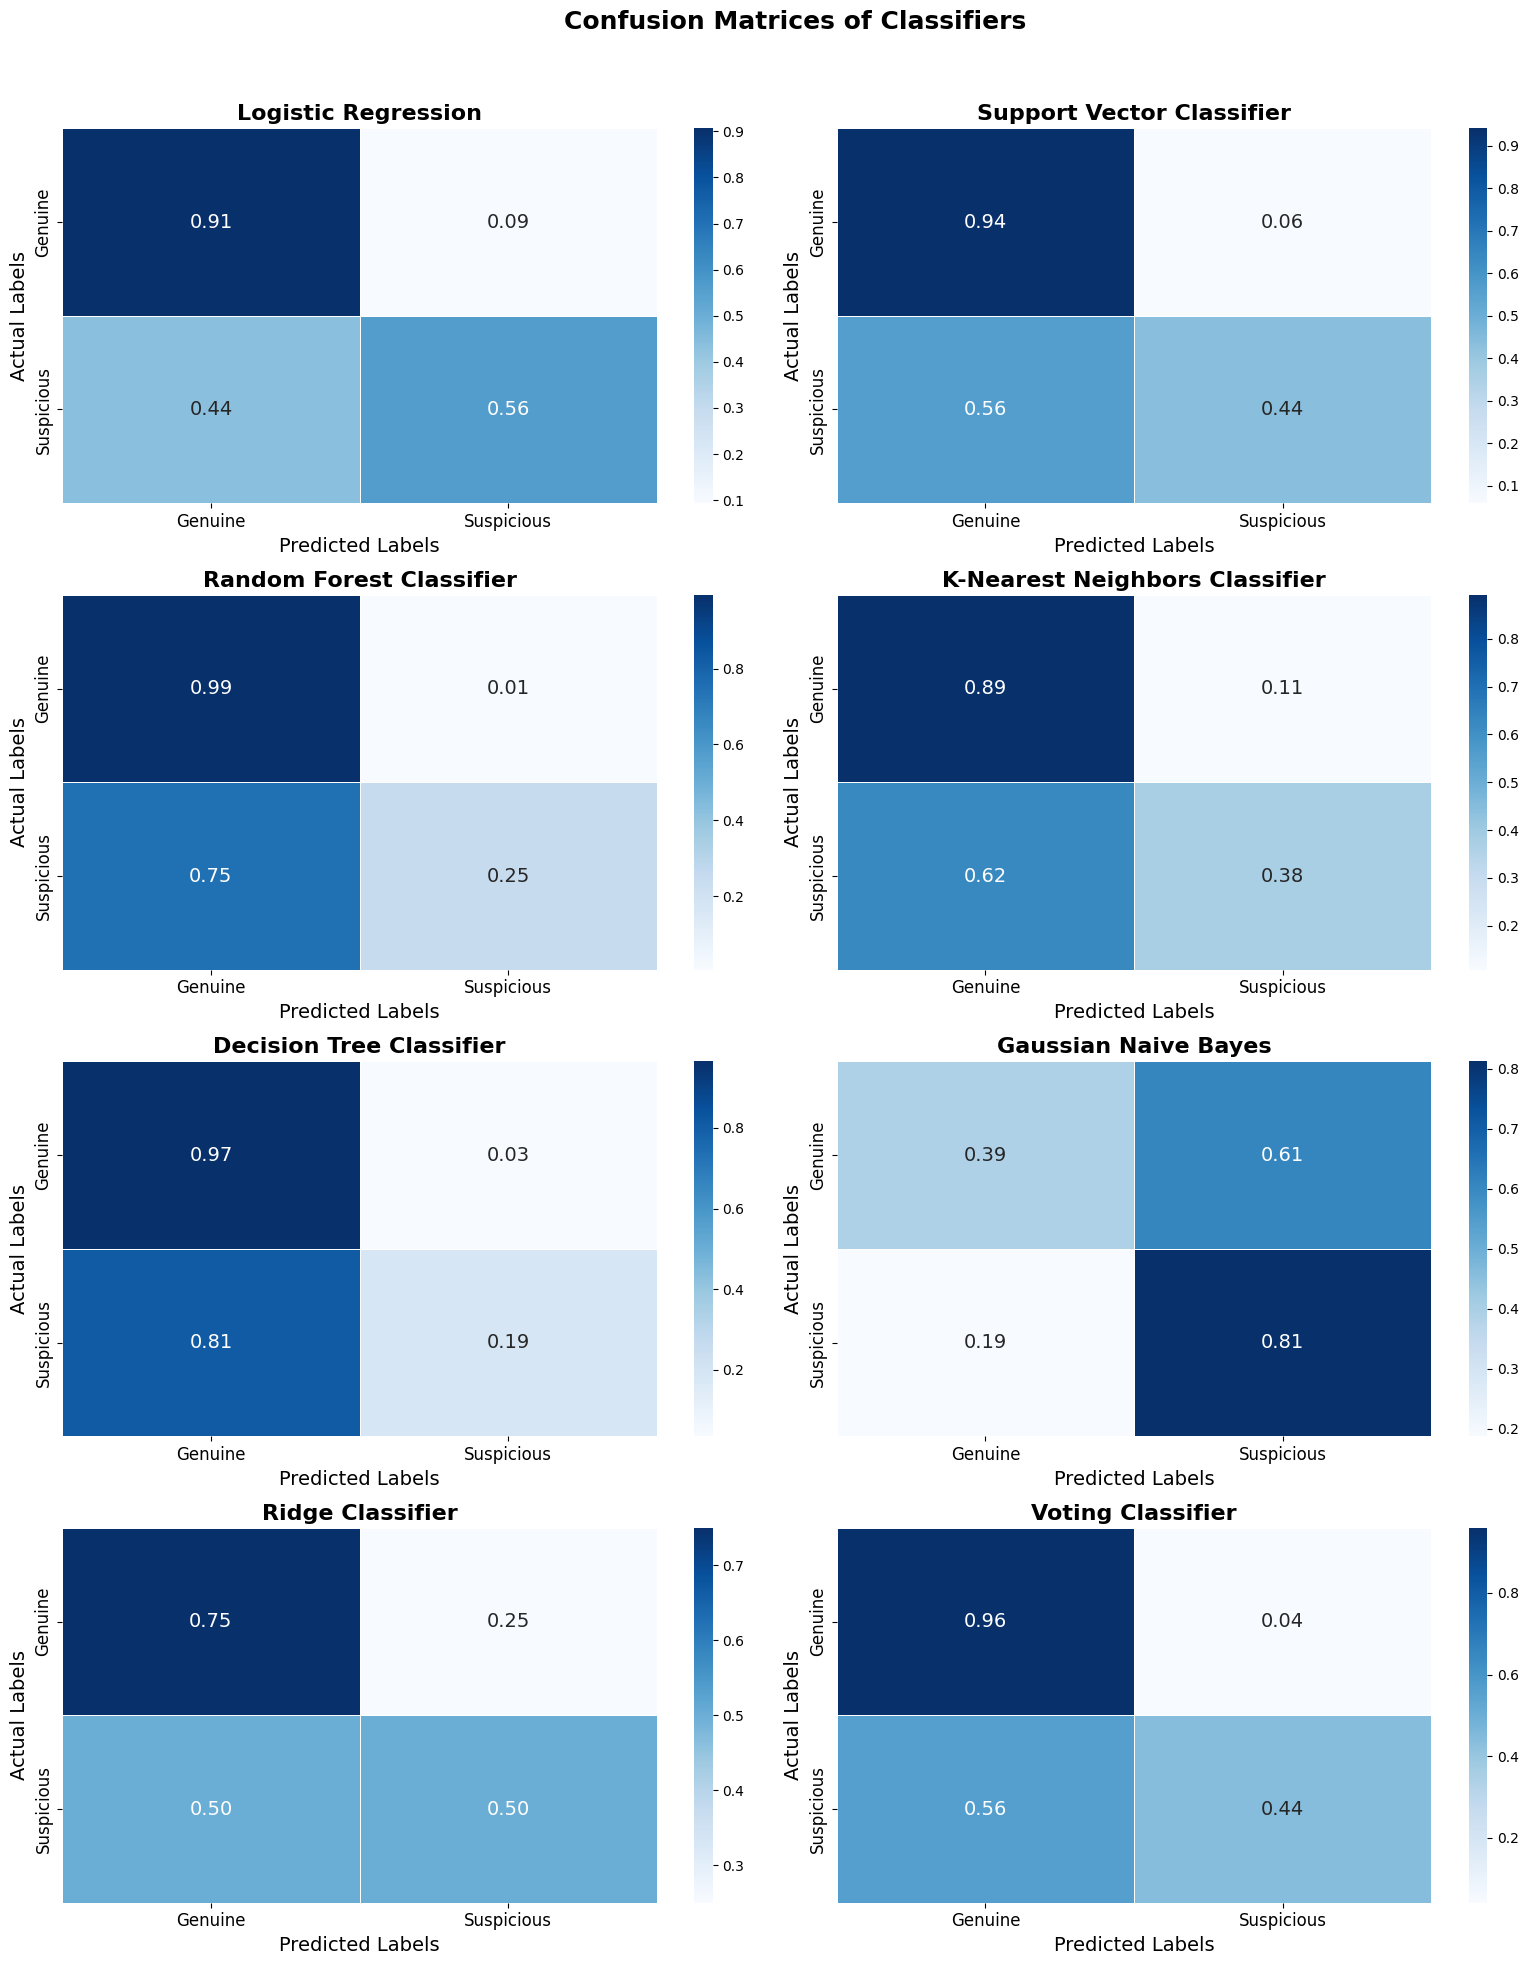

In [82]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare the data
X = ML_df.drop(['Sender_Status','Agent Repcode'], axis=1)
y = ML_df['Sender_Status']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

if len(pd.Series(y_train).value_counts()) > 1:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    smote = SMOTE(random_state=0)
    X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

    classifiers = [
        (LogisticRegression(), "Logistic Regression"),
        (SVC(), "Support Vector Classifier"),
        (RandomForestClassifier(), "Random Forest Classifier"),
        (KNeighborsClassifier(), "K-Nearest Neighbors Classifier"),
        (DecisionTreeClassifier(), "Decision Tree Classifier"),
        (GaussianNB(), "Gaussian Naive Bayes"),
        (RidgeClassifier(), "Ridge Classifier"),
        (VotingClassifier(estimators=[
            ('lr', LogisticRegression()),
            ('rf', RandomForestClassifier()),
            ('svc', SVC())
        ], voting='hard'), "Voting Classifier")
    ]

    results = []
    confusion_matrices = {}
    kfold_results = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    for clf, clf_name in classifiers:
        clf.fit(X_train_res, y_train_res)

        y_train_pred = clf.predict(X_train_res)
        y_test_pred = clf.predict(X_test_scaled)

        train_accuracy = accuracy_score(y_train_res, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        train_precision = precision_score(y_train_res, y_train_pred, average='weighted')
        test_precision = precision_score(y_test, y_test_pred, average='weighted')
        train_recall = recall_score(y_train_res, y_train_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')
        train_f1 = f1_score(y_train_res, y_train_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        results.append({
            'Classifier': clf_name,
            'Train Accuracy': train_accuracy * 100,
            'Test Accuracy': test_accuracy * 100,
            'Train Precision': train_precision * 100,
            'Test Precision': test_precision * 100,
            'Train Recall': train_recall * 100,
            'Test Recall': test_recall * 100,
            'Train F1 Score': train_f1 * 100,
            'Test F1 Score': test_f1 * 100
        })

        confusion_matrices[clf_name] = confusion_matrix(y_test, y_test_pred)

        y_cv_pred = cross_val_predict(clf, X, y, cv=skf)
        cv_accuracy = accuracy_score(y, y_cv_pred)
        cv_precision = precision_score(y, y_cv_pred, average='weighted')
        cv_recall = recall_score(y, y_cv_pred, average='weighted')
        cv_f1 = f1_score(y, y_cv_pred, average='weighted')

        kfold_results.append({
            'Classifier': clf_name,
            'Cross-Validation Accuracy': cv_accuracy * 100,
            'Cross-Validation Precision': cv_precision * 100,
            'Cross-Validation Recall': cv_recall * 100,
            'Cross-Validation F1 Score': cv_f1 * 100
        })

    results_df = pd.DataFrame(results)
    kfold_df = pd.DataFrame(kfold_results)

    results_df = results_df.sort_values(
        by=['Test Accuracy', 'Train Accuracy', 'Test F1 Score', 'Test Precision', 'Test Recall'],
        ascending=[False, False, False, False, False]
    )

    kfold_df = kfold_df.sort_values(
        by=['Cross-Validation Accuracy', 'Cross-Validation F1 Score'],
        ascending=[False, False]
    )

    percentage_columns = [
        'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision',
        'Train Recall', 'Test Recall', 'Train F1 Score', 'Test F1 Score'
    ]
    results_df[percentage_columns] = results_df[percentage_columns].applymap(lambda x: f"{x:.2f}%")
    kfold_df.iloc[:, 1:] = kfold_df.iloc[:, 1:].applymap(lambda x: f"{x:.2f}%")

    fig, axes = plt.subplots(4, 2, figsize=(16, 20))
    axes = axes.flatten()
    cm_labels = ['Genuine', 'Suspicious']

    for idx, (clf_name, cm) in enumerate(confusion_matrices.items()):
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=True, ax=axes[idx],
                    xticklabels=cm_labels, yticklabels=cm_labels, annot_kws={"size": 14}, linewidths=0.5)
        axes[idx].set_title(f"{clf_name}", fontsize=16, fontweight='bold')
        axes[idx].set_xlabel("Predicted Labels", fontsize=14)
        axes[idx].set_ylabel("Actual Labels", fontsize=14)
        axes[idx].tick_params(axis='both', which='major', labelsize=12)

    fig.suptitle("Confusion Matrices of Classifiers", fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('confusion_matrices_for_thesis.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print("The target variable has only one class. SMOTE cannot be applied.")


In [84]:
results_df.to_excel(r"C:\Users\HP\Desktop\SW Project\results.xlsx")
results_df

,Classifier,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
2,Random Forest Classifier,100.00%,97.75%,100.00%,97.21%,100.00%,97.75%,100.00%,97.38%
4,Decision Tree Classifier,100.00%,94.80%,100.00%,96.15%,100.00%,94.80%,100.00%,95.45%
7,Voting Classifier,95.66%,94.80%,95.70%,96.90%,95.66%,94.80%,95.66%,95.74%
1,Support Vector Classifier,93.87%,92.98%,93.87%,96.76%,93.87%,92.98%,93.87%,94.65%
0,Logistic Regression,86.54%,89.89%,86.92%,96.95%,86.54%,89.89%,86.50%,92.93%
3,K-Nearest Neighbors Classifier,96.46%,88.06%,96.68%,96.37%,96.46%,88.06%,96.45%,91.77%
6,Ridge Classifier,76.93%,74.44%,77.12%,96.38%,76.93%,74.44%,76.88%,83.42%
5,Gaussian Naive Bayes,65.47%,40.03%,72.95%,96.75%,65.47%,40.03%,62.40%,54.89%


In [85]:
kfold_df.to_excel(r"C:\Users\HP\Desktop\SW Project\Kfold.xlsx")
kfold_df

,Classifier,Cross-Validation Accuracy,Cross-Validation Precision,Cross-Validation Recall,Cross-Validation F1 Score
2,Random Forest Classifier,98.19%,97.90%,98.19%,97.76%
6,Ridge Classifier,97.85%,97.90%,97.85%,96.90%
1,Support Vector Classifier,97.72%,95.50%,97.72%,96.60%
7,Voting Classifier,97.72%,95.50%,97.72%,96.60%
0,Logistic Regression,97.68%,95.50%,97.68%,96.58%
3,K-Nearest Neighbors Classifier,97.60%,95.50%,97.60%,96.54%
4,Decision Tree Classifier,97.01%,97.24%,97.01%,97.12%
5,Gaussian Naive Bayes,61.27%,95.45%,61.27%,74.11%


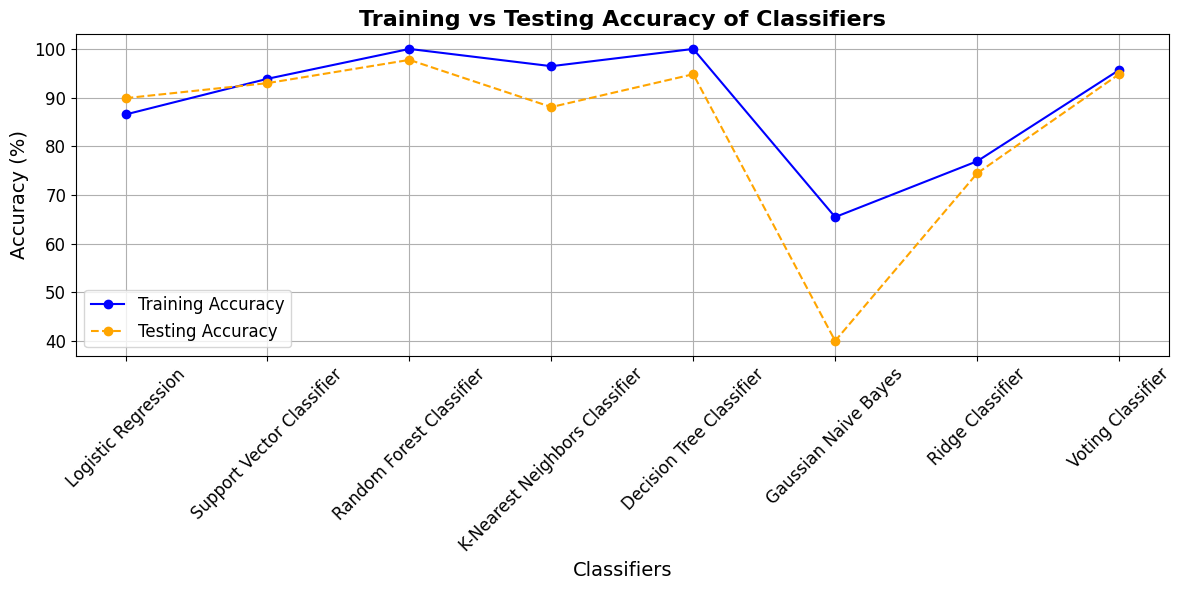

In [86]:
# Extracting accuracies
classifiers_names = [result['Classifier'] for result in results]
train_accuracies = [result['Train Accuracy'] for result in results]
test_accuracies = [result['Test Accuracy'] for result in results]

# Plotting Training and Testing Accuracy
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(classifiers_names, train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='blue')
ax.plot(classifiers_names, test_accuracies, label='Testing Accuracy', marker='o', linestyle='--', color='orange')

ax.set_title('Training vs Testing Accuracy of Classifiers', fontsize=16, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_xlabel('Classifiers', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.savefig('training_testing_accuracy_graph.png', dpi=300, bbox_inches='tight')
plt.show()


Skipping Voting Classifier: Classifier Voting Classifier does not support probabilities or decision functions.


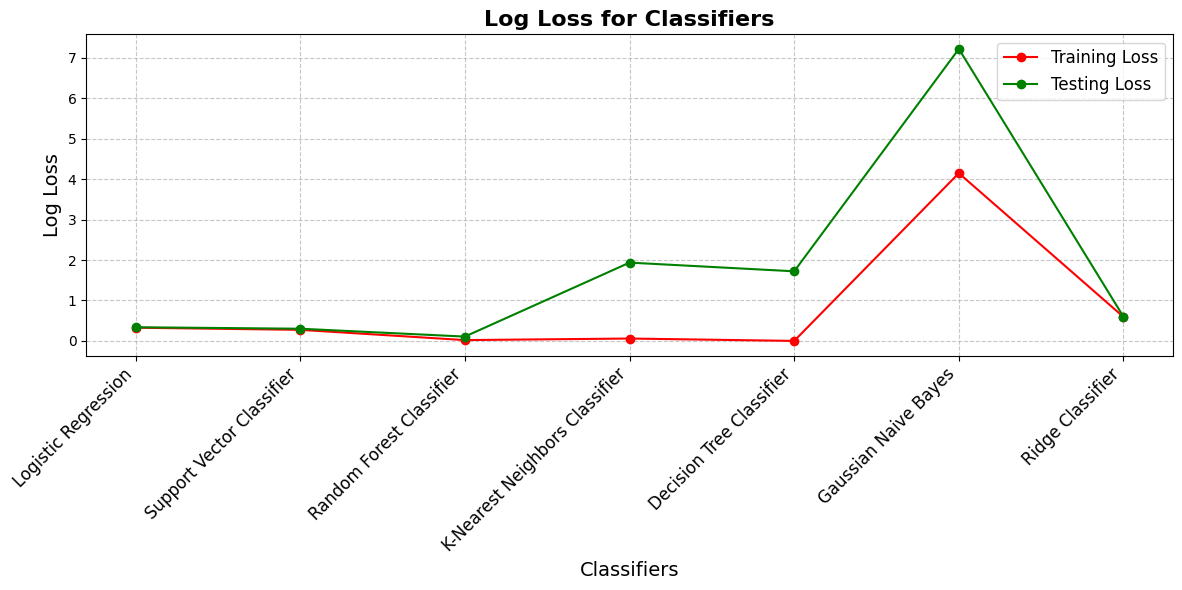

In [87]:
from sklearn.metrics import log_loss

train_losses = []
test_losses = []
classifier_names = []

for clf, clf_name in classifiers:
    clf.fit(X_train_res, y_train_res)

    try:
        if hasattr(clf, "predict_proba"):
            train_probs = clf.predict_proba(X_train_res)
            test_probs = clf.predict_proba(X_test_scaled)
        elif hasattr(clf, "decision_function"):
            train_scores = clf.decision_function(X_train_res)
            test_scores = clf.decision_function(X_test_scaled)
            
            if len(train_scores.shape) == 1:
                train_probs = np.column_stack([
                    1 - 1 / (1 + np.exp(-train_scores)),
                    1 / (1 + np.exp(-train_scores))
                ])
                test_probs = np.column_stack([
                    1 - 1 / (1 + np.exp(-test_scores)),
                    1 / (1 + np.exp(-test_scores))
                ])
            else:
                train_probs = np.exp(train_scores) / np.sum(np.exp(train_scores), axis=1, keepdims=True)
                test_probs = np.exp(test_scores) / np.sum(np.exp(test_scores), axis=1, keepdims=True)
        else:
            raise ValueError(f"Classifier {clf_name} does not support probabilities or decision functions.")

        train_loss = log_loss(y_train_res, train_probs)
        test_loss = log_loss(y_test, test_probs)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        classifier_names.append(clf_name)

    except Exception as e:
        print(f"Skipping {clf_name}: {e}")

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(classifier_names, train_losses, label="Training Loss", marker='o', color='red')
ax.plot(classifier_names, test_losses, label="Testing Loss", marker='o', color='green')

ax.set_title("Log Loss for Classifiers", fontsize=16, fontweight='bold')
ax.set_xlabel("Classifiers", fontsize=14)
ax.set_ylabel("Log Loss", fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.savefig("log_loss_plot.png", dpi=300)
plt.show()
